In [13]:
# Required libraries
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
# Setting up the grid
grid_size = 6  # 6x6 grid (0-indexed, so size is 6 to include (5,5))
goal = (5, 5)
obstacles = [(2, 2), (2, 4), (3, 5), (4, 2), (5, 4)]  # Updated obstacles

In [17]:
# Actions and Q table
actions = ["UP", "DOWN", "LEFT", "RIGHT"]
q = np.zeros((grid_size, grid_size, len(actions)))

In [19]:
# Submarine movements (action)
def move(state, action):
    moves = {"UP": (-1, 0), "DOWN": (1, 0), "LEFT": (0, -1), "RIGHT": (0, 1)}
    new_state = (state[0] + moves[action][0], state[1] + moves[action][1])
    
    # Ensure the new state is within bounds and not an obstacle
    if 0 <= new_state[0] < grid_size and 0 <= new_state[1] < grid_size and new_state not in obstacles:
        return new_state
    else:
        return state

In [21]:
# Training the model
for _ in range(100):
    state = (0, 0)
    while state != goal:
        action = random.choice(actions)
        new_state = move(state, action)
        reward = 10 if new_state == goal else (-5 if new_state in obstacles else -1)
        q[state][actions.index(action)] += 0.5 * (
            reward + 0.9 * np.max(q[new_state]) - q[state][actions.index(action)]
        )
        state = new_state

In [23]:
# Testing
state, path = (0, 0), [(0, 0)]
while state != goal:
    action = actions[np.argmax(q[state])]
    state = move(state, action)
    path.append(state)

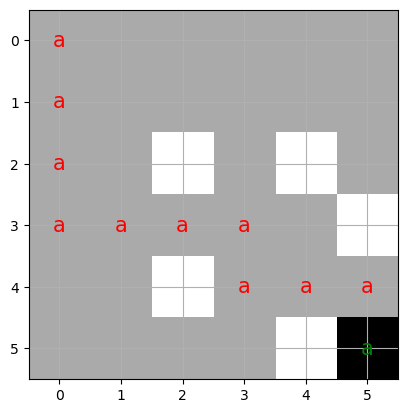

In [25]:
# Draw the path
grid = np.zeros((grid_size, grid_size))
for obs in obstacles:
    grid[obs] = -1

grid[goal] = 2  # Mark goal with 2

plt.imshow(grid, cmap="gray_r", origin="upper")
for (x, y) in path:
    plt.text(y, x, "a", ha="center", va="center", fontsize=15, color="red" if (x, y) != goal else "green")

plt.xticks(range(grid_size))
plt.yticks(range(grid_size))
plt.grid(True)
plt.show()